In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
import cvxpy as cvx
from model.distrs import StudentTDistribution as TDistribution, NormalDistribution,RademacherDistribution
from model.distrs import E,Var,Std
from model.math_ops import D
import model.synth_data as synth
import model.utility as ut
import model.problem as pr
from helper.stats import five_stats

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (6,4)
mpl.rcParams['font.size'] = 10
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['savefig.dpi'] = 100
plt.rc('text',usetex=True)
plt.rc('font',serif='times')

In [10]:
p_true = 40
sz = np.arange(4,p_true+1)

n_true = 5000
n_experiments = 50
λ = 3
δ = 0.2

r_threshold = 60
β = 0.5
u = ut.LinearPlateauUtility(β,r_threshold)

In [11]:
R_true = NormalDistribution(5,10)
X_true = [RademacherDistribution() for _ in range(p_true)]
M_true = synth.GaussianMarket(X_true,R_true)
X,R = M_true.sample(n_true)
M = synth.MarketDiscreteDistribution(X,R)

In [14]:
# Real q∗ value computation
p_star = pr.Problem(X,R,λ=0,u=u)
p_star.solve()
q_star = p_star.q


OPTIMAL (within feastol=1.5e-10, reltol=6.1e-09, abstol=2.9e-08).
Runtime: 1.693861 seconds.

22  -4.698e+00  -4.698e+00  +2e-07  1e-13  1e-09  5e-12  1e-11  0.9691  4e-02   1  0  0 |  0  0
23  -4.698e+00  -4.698e+00  +3e-08  2e-14  1e-10  6e-13  2e-12  0.9890  1e-01   1  0  0 |  0  0
20  -4.698e+00  -4.698e+00  +2e-05  8e-12  8e-08  4e-10  1e-09  0.9890  4e-02   1  0  0 |  0  0
21  -4.698e+00  -4.698e+00  +3e-06  2e-12  2e-08  7e-11  2e-10  0.8134  3e-02   1  0  0 |  0  0
18  -4.698e+00  -4.698e+00  +8e-04  4e-10  4e-06  2e-08  6e-08  0.8560  1e-01   1  0  0 |  0  0
19  -4.698e+00  -4.698e+00  +3e-04  2e-10  1e-06  7e-09  2e-08  0.8743  2e-01   1  0  0 |  0  0
16  -4.697e+00  -4.700e+00  +1e-02  6e-09  6e-05  3e-07  8e-07  0.6838  2e-01   1  0  0 |  0  0
17  -4.697e+00  -4.698e+00  +3e-03  2e-09  2e-05  8e-08  2e-07  0.9890  3e-01   1  0  0 |  0  0
14  -4.689e+00  -4.710e+00  +8e-02  4e-08  4e-04  2e-06  5e-06  0.6914  6e-02   1  0  0 |  0  0
15  -4.695e+00  -4.702e+00  +3e-02  1e-08

In [15]:
R_star_q_star = p_star.insample_cost(q_star)
CE_star_q_star = p_star.insample_CE(q_star)

In [0]:
## $p=O(1)$

In [17]:
ns1 = sz*10
ps1 = np.ones_like(sz)*p_true
np.array([ps1,ns1]).T

array([[ 40,  40],
       [ 40,  50],
       [ 40,  60],
       [ 40,  70],
       [ 40,  80],
       [ 40,  90],
       [ 40, 100],
       [ 40, 110],
       [ 40, 120],
       [ 40, 130],
       [ 40, 140],
       [ 40, 150],
       [ 40, 160],
       [ 40, 170],
       [ 40, 180],
       [ 40, 190],
       [ 40, 200],
       [ 40, 210],
       [ 40, 220],
       [ 40, 230],
       [ 40, 240],
       [ 40, 250],
       [ 40, 260],
       [ 40, 270],
       [ 40, 280],
       [ 40, 290],
       [ 40, 300],
       [ 40, 310],
       [ 40, 320],
       [ 40, 330],
       [ 40, 340],
       [ 40, 350],
       [ 40, 360],
       [ 40, 370],
       [ 40, 380],
       [ 40, 390],
       [ 40, 400]])

In [18]:
qs1 = np.zeros(shape=(len(ns1),p_true+1,n_experiments))
CEs_ins1 = np.empty(shape=(len(ns1),n_experiments))
CEs_oos1 = np.empty(shape=(len(ns1),n_experiments))

for i,(n,p) in enumerate(zip(ns1,ps1)):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ,u,Rf=0,problem_t=pr.MaskedProblem)
    prs.sample(n_experiments,{'fs':range(p+1)},par=True)
    qs1[i,:p+1,:] = prs.qs.T
    CEs_ins1[i,:] = prs.CEs_ins
    CEs_oos1[i,:] = prs.CEs_oos

Sampling 50 problems of size 400 × 41
Sampling 50 problems of size 390 × 41
Sampling 50 problems of size 380 × 41
Sampling 50 problems of size 370 × 41
Sampling 50 problems of size 360 × 41
Sampling 50 problems of size 350 × 41
Sampling 50 problems of size 340 × 41
Sampling 50 problems of size 330 × 41
Sampling 50 problems of size 320 × 41
Sampling 50 problems of size 310 × 41
Sampling 50 problems of size 300 × 41
Sampling 50 problems of size 290 × 41
Sampling 50 problems of size 280 × 41
Sampling 50 problems of size 270 × 41
Sampling 50 problems of size 260 × 41
Sampling 50 problems of size 250 × 41
Sampling 50 problems of size 240 × 41
Sampling 50 problems of size 230 × 41
Sampling 50 problems of size 220 × 41
Sampling 50 problems of size 210 × 41
Sampling 50 problems of size 200 × 41
Sampling 50 problems of size 190 × 41
Sampling 50 problems of size 180 × 41
Sampling 50 problems of size 170 × 41
Sampling 50 problems of size 160 × 41
Sampling 50 problems of size 150 × 41
Sampling 50 

In [19]:
γ = u.γ
r_bar = max(R)
ξ = np.max(np.linalg.norm(X,axis=1))
δ = 0.1
norm_qstar = np.linalg.norm(q_star)
Ω = γ*r_bar**2*ξ**2/λ * (γ/(2*ns1) + (1+γ)*np.sqrt(np.log(1/δ))/np.sqrt(2*ns1))
ω = -λ*norm_qstar**2 - 8*γ**2*ξ**2*(32+np.log(1/δ))/(ns1*λ) - 2*γ*r_bar*ξ**2/λ * np.sqrt((32+np.log(1/δ))/ns1)

In [20]:
error_CE1 = CEs_oos1-CEs_ins1
center_CE1 = np.median(error_CE1,axis=1)
bottom_CE1 = np.percentile(error_CE1,10,axis=1)-center_CE1
top_CE1 = -np.percentile(error_CE1,90,axis=1)+center_CE1

error_bound1 = -(Ω/(D(u)(CEs_ins1)).T).T # double transpose is for broadcastigne
center_bound1 = np.median(error_bound1,axis=1)
bottom_bound1 = np.percentile(error_bound1,10,axis=1)-center_bound1
top_bound1 = -np.percentile(error_bound1,90,axis=1)+center_bound1

for i in range(len(top_CE1)):
    if (i+1)%3 != 0:
        bottom_CE1[i] = np.nan
        top_CE1[i] = np.nan
        bottom_bound1[i] = np.nan
        top_bound1[i] = np.nan

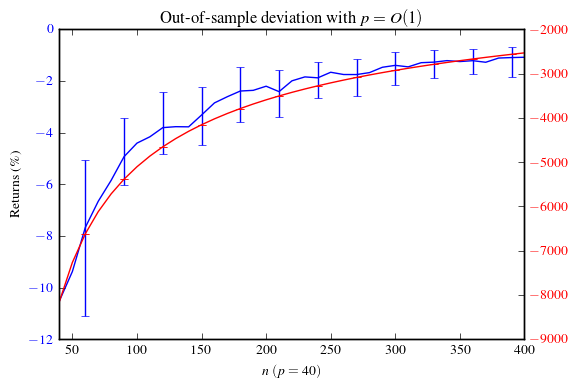

In [22]:
fig1_oos = plt.figure()
ax11_oos = fig1_oos.add_subplot(111)
ax21_oos = ax11_oos.twinx()

ax11_oos.errorbar(ns1,center_CE1,yerr=[top_CE1,bottom_CE1],color='b')
ax11_oos.axis(xmin=min(ns1))
ax11_oos.set_xlabel('$n\,\,(p=40)$')
ax11_oos.set_ylabel('Returns (\%)');
for t in ax11_oos.get_yticklabels():
    t.set_color('b')

ax21_oos.errorbar(ns1,center_bound1,yerr=[top_bound1,bottom_bound1],color='r')
# ax21_oos.axis(xmin=min(ns1),ymax=0,ymin=-1000000)
for t in ax21_oos.get_yticklabels():
    t.set_color('r')

ax11_oos.set_title('Out-of-sample deviation with $p=O(1)$');

In [23]:
error_CE1sub = CE_star_q_star - CEs_oos1
center_CE1sub = np.median(error_CE1sub,axis=1)
bottom_CE1sub = np.percentile(error_CE1sub,10,axis=1)-center_CE1sub
top_CE1sub = -np.percentile(error_CE1sub,90,axis=1)+center_CE1sub

error_bound1sub = -(ω/(D(u)(CEs_oos1)).T).T
center_bound1sub = np.median(error_bound1sub,axis=1)
bottom_bound1sub = np.percentile(error_bound1sub,10,axis=1)-center_bound1sub
top_bound1sub = -np.percentile(error_bound1sub,90,axis=1)+center_bound1sub

for i in range(len(top_CE1sub)):
    if (i+1)%3 != 0:
        bottom_CE1sub[i] = np.nan
        top_CE1sub[i] = np.nan
        bottom_bound1sub[i] = np.nan
        top_bound1sub[i] = np.nan

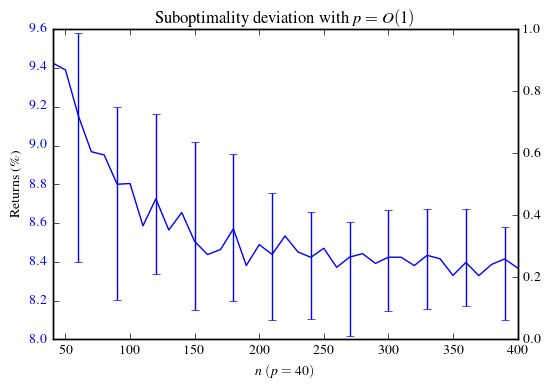

In [25]:
fig1_sub = plt.figure()
ax11_sub = fig1_sub.add_subplot(111)
ax21_sub = ax11_sub.twinx()

ax11_sub.errorbar(ns1,center_CE1sub,yerr=[top_CE1sub,bottom_CE1sub])
ax11_sub.axis(xmin=min(ns1))
ax11_sub.set_xlabel('$n\,\,(p=40)$')
ax11_sub.set_ylabel('Returns (\%)');
# ax11_sub.axis(ymax=7)
for t in ax11_sub.get_yticklabels():
    t.set_color('b')


# ax21_sub.errorbar(ns1,center_bound1sub,yerr=[top_bound1sub,bottom_bound1sub],color='r')
# # ax21_sub.axis(xmin=min(ns1),ymin=0,ymax=150000)
# for t in ax21_sub.get_yticklabels():
#     t.set_color('r')

ax11_sub.set_title('Suboptimality deviation with $p=O(1)$');